# Metrics and Plots for the trained models

In [1]:
MAIN_DUMP='../dump/'
import os,sys
from joblib import Parallel, delayed,dump,load

sys.path.append(os.path.abspath('../src/ml'))
from load_matrix import load_df
from model_trainer import MLModel
from utils import load_models

import pandas as pd

from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer


## v2.10

In [7]:
ALL_MODELS_v2_10=load_models(MAIN_DUMP,'v2.10')

In [3]:
collector = ResultsCollector()
metrics_list = []
metrics_list=[]
for model_name, ml_model in ALL_MODELS_v2_10.items():
    print(f'-- Evaluating model: {model_name} v2.10 --')
    y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
    metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
    metrics_list.append({
            "model": ml_model.model_type,
            "input": ml_model.dataset_name,
            **metrics
    })

    collector.add(ml_model.model_type, ml_model.dataset_name, y_test, y_pred, y_proba)

-- Evaluating model: pytorch_mlp_gene_expression_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_Complex_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_Complex_sample_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_concatenated_sample_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_gene_expression_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_RGCN_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_RGCN_sample_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: sklearn_mlp_Complex_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: sklearn_mlp_Complex_sample_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: sklearn_mlp_concatenated_protein_embeddings_gridsearch_mo

In [4]:
results_df_v2_10 = pd.DataFrame(metrics_list)
# results_df_v2_10 = results_df_v2_10.sort_values(by=['input','model']).reset_index(drop=True)

results_df_v2_10

,model,input,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
0,pytorch_mlp,gene_expression,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.787879,0.787879
1,random_forest,Complex_protein_embeddings,0.980769,1.000000,0.961538,0.980392,0.917249,0.994505,0.998575,0.053283
2,random_forest,Complex_sample_embeddings,0.480769,0.781250,0.961538,0.862069,-0.091725,0.549451,0.840522,0.185308
3,random_forest,concatenated_protein_embeddings,0.980769,1.000000,0.961538,0.980392,0.917249,0.994505,0.998575,0.049367
4,random_forest,concatenated_sample_embeddings,0.585165,0.821429,0.884615,0.851852,0.194206,0.802198,0.942317,0.139284
5,random_forest,gene_expression,0.928571,0.962963,1.000000,0.981132,0.908514,1.000000,1.000000,0.069905
6,random_forest,RGCN_protein_embeddings,0.837912,0.925926,0.961538,0.943396,0.716328,0.978022,0.994542,0.065829
7,random_forest,RGCN_sample_embeddings,0.728022,0.884615,0.884615,0.884615,0.456044,0.793956,0.925796,0.137938
8,sklearn_mlp,Complex_protein_embeddings,0.500000,0.787879,1.000000,0.881356,0.000000,0.978022,0.994235,0.202359
9,sklearn_mlp,Complex_sample_embeddings,0.532967,0.800000,0.923077,0.857143,0.093761,0.521978,0.778986,0.198708


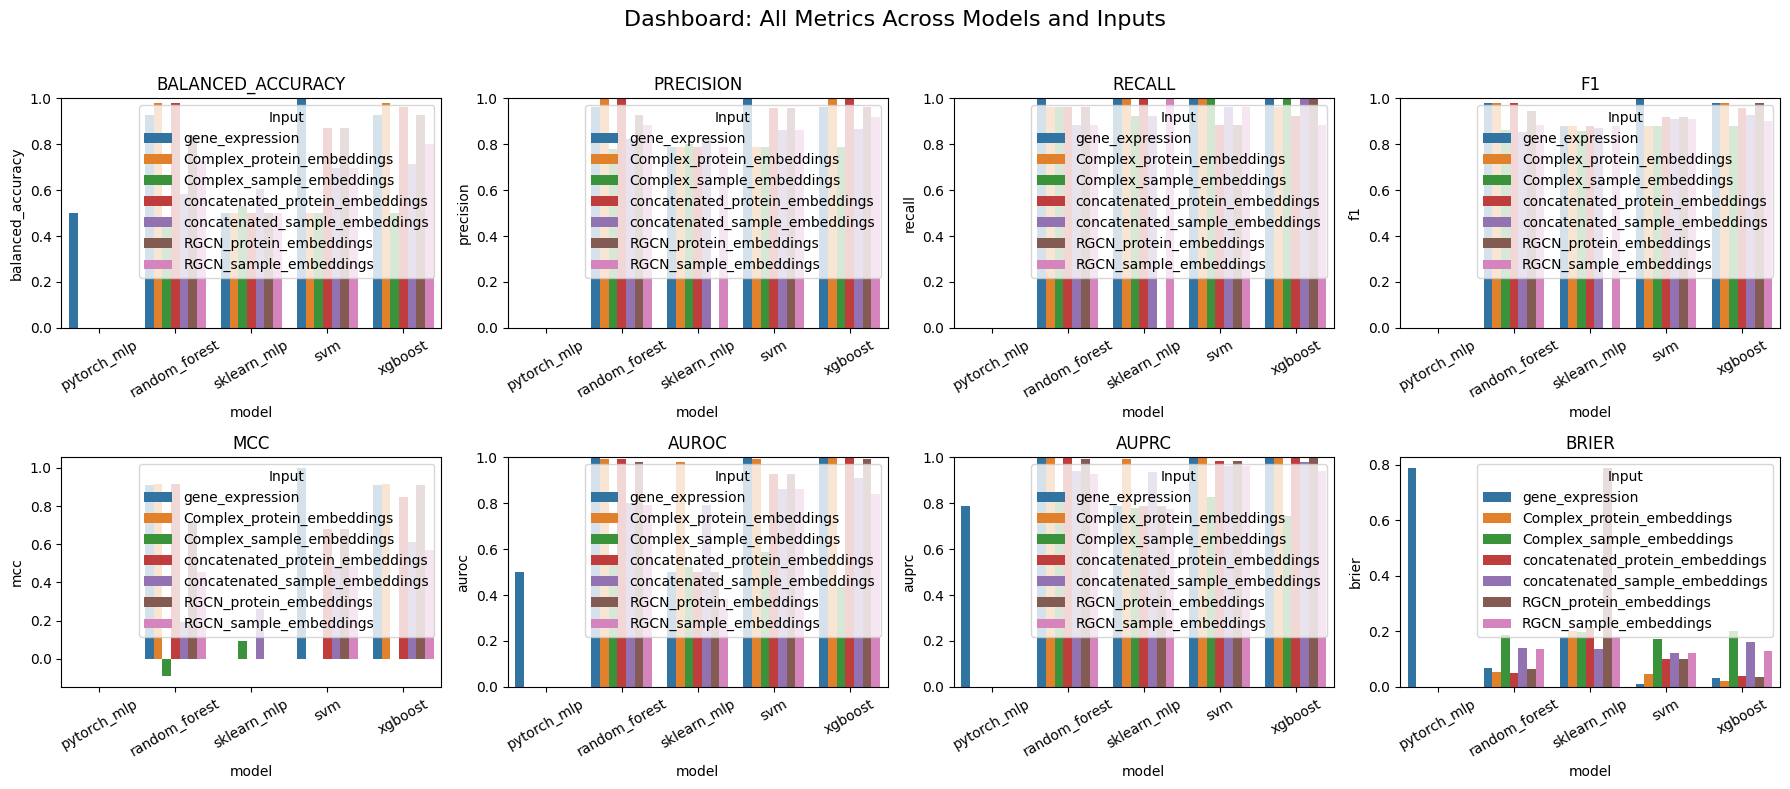

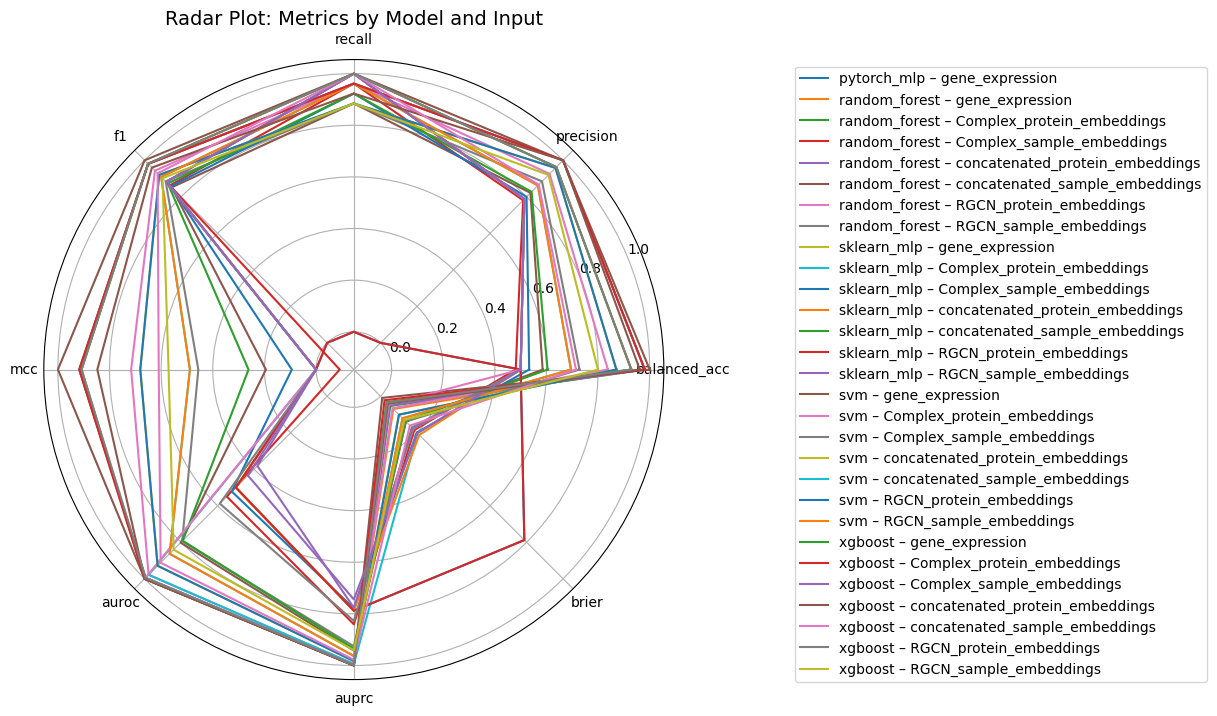

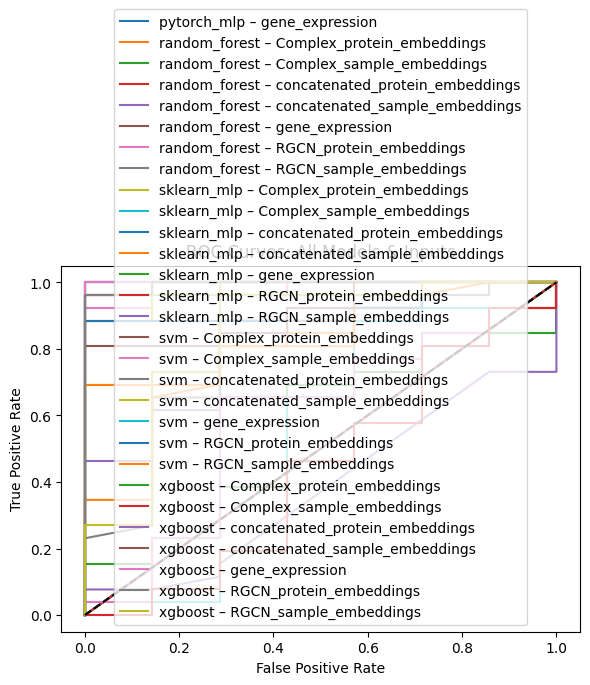

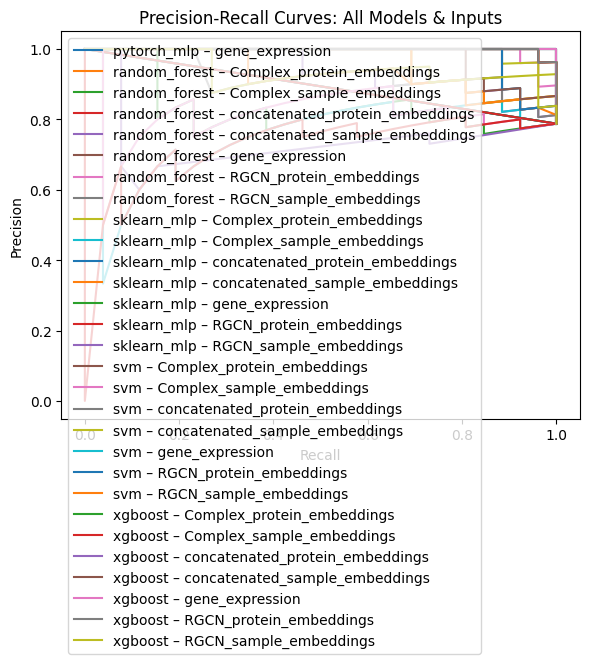

In [5]:
dashboard = DashboardVisualizer(results_df_v2_10, collector)
dashboard.plot_metric_grid()
dashboard.plot_radar()
dashboard.plot_roc_curves()
dashboard.plot_pr_curves()